In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics,tree
from sklearn.preprocessing import binarize, label_binarize
# from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.multiclass import OneVsRestClassifier
import itertools
from itertools import cycle
from functools import reduce
from pandas import DataFrame
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', 310)


# Functions

In [3]:
# fitting the model and getting the predicted values from the model
# Will need to make this equal y_pred_'model_ran'
def fit_model(model_ran,X_train,y_train, X_test,y_test):
    model_ran.fit(X_train,y_train)
    return [model_ran.predict(X_test)]


# Run model for accuracy score, cross validation  avg accuracy score, precision score, recall score, and f1 score
def run_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    
    return [name,
            accuracy_score(y_test, y_prediction_of_a_model),
            cross_val_score(model_ran, X,y, cv=10).mean(),
            precision_score(y_test, y_prediction_of_a_model, average='weighted'),
            recall_score(y_test, y_prediction_of_a_model, average = 'weighted'),
            f1_score(y_test, y_prediction_of_a_model, average='weighted')]
    
    
# Print accuracy score, cross validation  avg accuracy score, precision score, recall score, and f1 score
def print_model(name,model_ran, X, y, y_test,  y_prediction_of_a_model):
    accuracy = accuracy_score(y_test, y_prediction_of_a_model)
    cross_val = cross_val_score(model_ran, X,y, cv=10).mean()
    precision = precision_score(y_test, y_prediction_of_a_model, average='weighted')
    recall = recall_score(y_test, y_prediction_of_a_model, average = 'weighted')
    f1 = f1_score(y_test, y_prediction_of_a_model, average='weighted')
    print(f'{name} Prediction accuracy is: {accuracy}\n {name} Mean cross validation is: {cross_val}\n  {name} Precision score is: {precision}\n   {name} Prediction recall score is: {recall}\n    {name} Prediction f1 score is: {f1}')



def pred_manual_data(model_ran, X,y, X2_manual):

    model_ran.fit(X, y)
    model_ran.y2_pred_X_manual = model_ran.predict(X2_manual)
    for x in model_ran.y2_pred_X_manual:
        if x == 3:
            print(f' The predicted class of the manually added X value is {model_ran.y2_pred_X_manual} or Highly Scored on Metacritic')
        elif x == 2:
            print(f' The predicted class of the manually added X value is {model_ran.y2_pred_X_manual} or Moderately Scored on Metacritic')
        else:
            print(f' The predicted class of the manually added X value is {model_ran.y2_pred_X_manual} or Poorly Scored on Metacritic')



In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Data import from made CSV files

In [6]:
data_le = pd.read_csv("DataFrames/data_le.csv")
data_le_dummy = pd.read_csv('DataFrames/data_le_dummy.csv')
data_original = pd.read_csv('DataFrames/data_original.csv')
data_le_nums = pd.read_csv('DataFrames/data_le_nums.csv')


In [7]:
data_le.describe(include = 'O').transpose()


,count,unique,top,freq
Name,4278,4278,Divinity II: Flames of Vengeance,1
Genre,4278,12,Action,839
Publisher,4278,247,Electronic Arts,386
Developer,4278,1185,Capcom,95
Rating,4278,5,T,1564
Platform,4278,417,PS2,597


# Critic Score Classification

Platform                      3DS    DC     DS    GBA     GC     PC    PS  \
Critic_Score_Classification                                                 
1                             1.0   NaN   28.0   11.0   15.0    6.0   9.0   
2                            97.0   NaN  284.0  110.0  177.0  232.0  57.0   
3                            52.0  14.0  154.0  116.0  156.0  381.0  84.0   

Platform                       PS2    PS3   PS4    PSP   PSV    Wii  WiiU  \
Critic_Score_Classification                                                 
1                             29.0   22.0   4.0    6.0   1.0   36.0   4.0   
2                            671.0  390.0  72.0  258.0  63.0  321.0  39.0   
3                            441.0  360.0  79.0  126.0  44.0  122.0  40.0   

Platform                      X360     XB  XOne  
Critic_Score_Classification                      
1                             49.0   20.0   4.0  
2                            440.0  278.0  40.0  
3                           

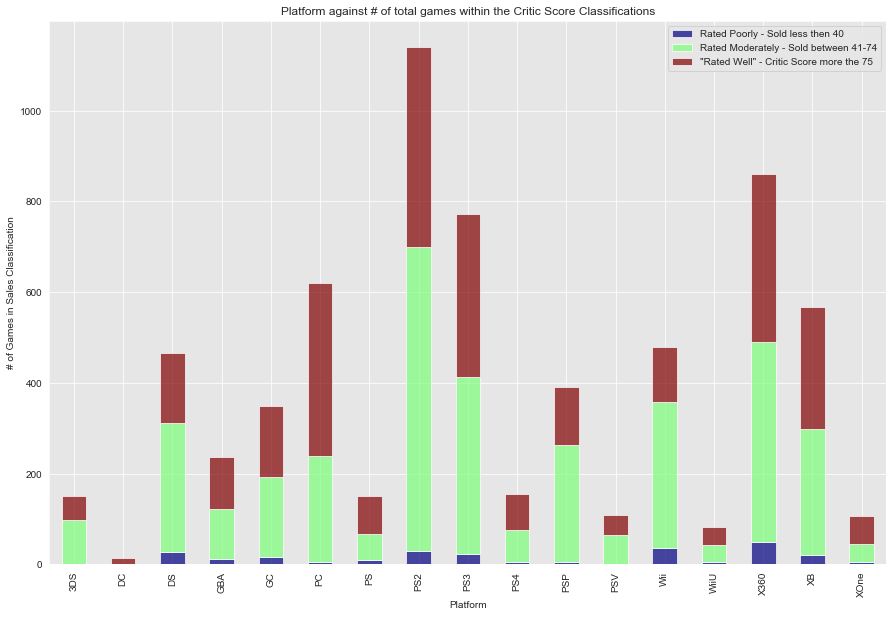

In [8]:
data_le_crit_clas = data_original.copy(deep=True)
data_le_crit_clas['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 40 else 2 for x in data_original['Critic_Score']]


crit_clas_plat = data_le_crit_clas.groupby(['Platform','Critic_Score_Classification']).Critic_Score_Classification.count().unstack()
# print(data_le_sales_clas.groupby(['Sold_Classification','Genre']).Global_Sales.count().unstack())
print(data_le_crit_clas.groupby(['Critic_Score_Classification','Platform']).Critic_Score.count().unstack())

p2 = crit_clas_plat.plot(kind = 'bar', stacked = True,
                    alpha = .70, cmap='jet',figsize=(15,10))
p2.set_title('Platform against # of total games within the Critic Score Classifications')
p2.set_xlabel('Platform')
p2.set_ylabel('# of Games in Sales Classification')
p2.legend(['Rated Poorly - Sold less then 40', 'Rated Moderately - Sold between 41-74','"Rated Well" - Critic Score more the 75'])
plt.show()

# Classification Modeling

## Setup for the Classifying

In [9]:
data_dummy_crit_scor_clas = data_le_dummy.copy()

In [10]:
# separated Critic Score into 3 groups  {1 = score @ 50 or less; 2 = score @ 51-74; 3 = score @ 75 or more}

#Avg Critic_score is 72.768

data_dummy_crit_scor_clas['Critic_Score_Classification'] = data_le_dummy['Critic_Score_Classification'] = [3 if x  >= 75 else 1  if x  <= 40 else 2 for x in data_le_dummy['Critic_Score']]



In [11]:
# data_le_dummy = data_le_dummy.drop(columns=['Critic_Score_Classification', 'Sold_Classification'])
# data_le_dummy.head(3)

## Classification for Critic's Score 

In [12]:
# Had to drop a few features to increase accuracy

X2 = data_dummy_crit_scor_clas.drop([
'Critic_Score_Classification','Name','10TACLE Studios','Ascaron Entertainment GmbH','Blue Byte','Bohemia Interactive','Conspiracy Entertainment','Crimson Cow','DSI Games','Devolver Digital','ESP','Fox Interactive','Gamebridge','Global A Entertainment','HMH Interactive','Harmonix Music Systems','Iceberg Interactive',
'Idea Factory International','Kool Kizz','Max Five','Media Rings','Mud Duck Productions','Nobilis','NovaLogic','Phantagram','Pinnacle','RP','Rebellion','Revolution Software','Sunflowers','Sunsoft','TalonSoft','Visco','White Park Bay Software','Yacht Club Games','Zushi Games','2D Boy','Ackkstudios','Agetec',
'Aqua Plus','Avalon Interactive','Brash Entertainment','Cave','City Interactive','Deep Silver','Destineer','DreamCatcher Interactive','Empire Interactive','Falcom Corporation','From Software','Ghostlight','Graphsim Entertainment','Groove Games','GungHo','Havas Interactive','Idea Factory','JoWood Productions',
'Just Flight','Lexicon Entertainment','Little Orbit','Metro 3D','Milestone S.r.l.','Mindscape','Nordic Games','Number None','Phantom EFX','Popcorn Arcade','Psygnosis','RTL','Rage Software','Rondomedia','Sammy Corporation','Screenlife','T','Takara Tomy','Tripwire Interactive','Valcon Games','Wanadoo','Xicat Interactive',
'Xplosiv','3DO','505 Games','BAM! Entertainment','Home Entertainment Suppliers','Ignition Entertainment','Jaleco','Kalypso Media','Kemco','Lighthouse Interactive','MTV Games','Majesco Entertainment','Nihon Falcom Corporation','Scholastic Inc.','Square','Sting','Success','Tru Blu Entertainment','Vivendi Games','Critic_Score'
], axis = 1)

y2 = data_dummy_crit_scor_clas['Critic_Score_Classification']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=3)


# Manual X values to run in prediction model to test an unknown value
X2_manual = np.array([2014,7.8,5.5,2.2,0.8,16.3,87,4300,0,1,0,  0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,   0,0,0,0,0,0,1,0,0,0,    0,0,0,0,0,0,1,  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape(1, -1)


print(f'{X2.shape},\n {y2.shape} ')

(4278, 190),
 (4278,) 


In [13]:
# for feature in sorted(zip(rf.feature_importances_, list(X2_train.columns))):
#     print(feature)

### Baseline

In [14]:
dummy_c = DummyClassifier()
dummy_c.fit(X2_train, y2_train)
y2_pred_dummy = dummy_c.predict(X2_test)

dummy_c_evalution = run_model('Baseline', dummy_c,X2,y2,y2_test,y2_pred_dummy)
print_model("Baseline", dummy_c,X2,y2,y2_test,y2_pred_dummy)



Baseline Prediction accuracy is: 0.4633956386292835
 Baseline Mean cross validation is: 0.4649553448563304
  Baseline Precision score is: 0.4603360806462049
   Baseline Prediction recall score is: 0.4633956386292835
    Baseline Prediction f1 score is: 0.4618422221934068


Confusion Matrix

[[  2  28  26]
 [ 28 385 289]
 [ 19 299 208]]
              precision    recall  f1-score   support

           1       0.04      0.04      0.04        56
           2       0.54      0.55      0.54       702
           3       0.40      0.40      0.40       526

    accuracy                           0.46      1284
   macro avg       0.33      0.33      0.33      1284
weighted avg       0.46      0.46      0.46      1284

Confusion Matrix, without normalization
[[  2  28  26]
 [ 28 385 289]
 [ 19 299 208]]


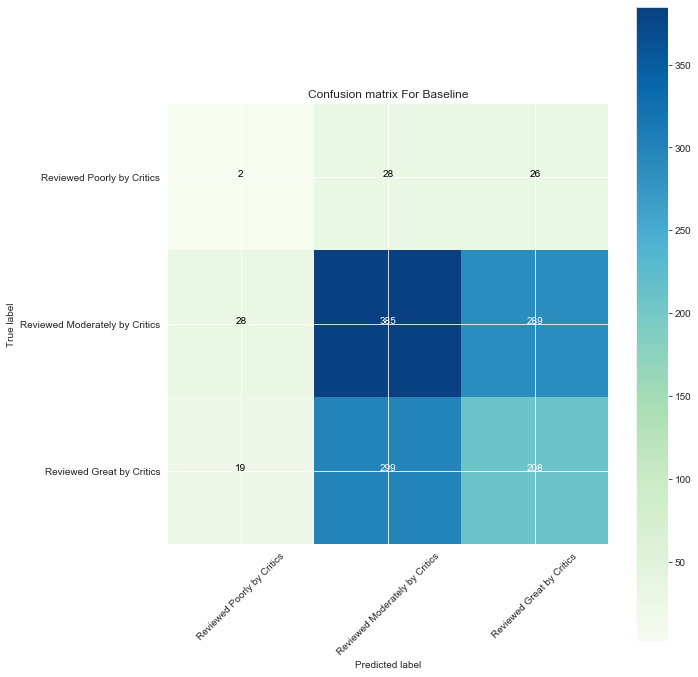

In [15]:
#text confusion matrix
print(confusion_matrix(y2_test, y2_pred_dummy))
print(classification_report(y2_test, y2_pred_dummy))

#visual confusion matrix
cm2 = confusion_matrix(y2_test,y2_pred_dummy)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix For Baseline',
                          cmap=plt.cm.GnBu,)

In [16]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_dummy[0:25])
print(f'Accurary from 1st 25 values is {(11/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 2 2 3 2 2 3 2 2 2 3 2 2 1 2 2 2 3 3 3 3 2 2]
Accurary from 1st 25 values is 44.0%


In [17]:
pred_manual_data(dummy_c,X2,y2, X2_manual)

 The predicted class of the manually added X value is [2] or Moderately Scored on Metacritic


### Logistic Regression Model

In [18]:
#LogisticRegression
logreg2= LogisticRegression()
logreg2.fit(X2_train,y2_train)
y2_pred_logreg = logreg2.predict(X2_test)

logreg_accuracy_train2 = logreg2.score(X2_train ,y2_train)
logreg_accuracy_test2 = logreg2.score(X2_test,y2_test)


# Cross Validation - Logistic Regression

logreg_cross_val_score2 = cross_val_score(logreg2, X2,y2, cv=10)
logreg_cv_score_avg2 = logreg_cross_val_score2.mean()
cv_pred_logreg2 = cross_val_predict(logreg2, X2_test, y2_test, cv=10)
                                              
             
print(f'Logistic Regression train accuracy is {logreg_accuracy_train2}\nLogistic Regression test accuracy is {logreg_accuracy_test2}\nMean Cross Validation logreg Regression is: {logreg_cv_score_avg2}')
y2_predict_proba_logreg2 = logreg2.predict_proba(X2_test)[:, 1]


logreg_evalution = run_model('Logistic Regression', logreg2,X2,y2,y2_test,y2_pred_logreg)
print_model("Logistic Regression", logreg2,X2,y2,y2_test,y2_pred_logreg)


Logistic Regression train accuracy is 0.7668670674682698
Logistic Regression test accuracy is 0.7087227414330218
Mean Cross Validation logreg Regression is: 0.725800674257248
Logistic Regression Prediction accuracy is: 0.7087227414330218
 Logistic Regression Mean cross validation is: 0.725800674257248
  Logistic Regression Precision score is: 0.7204677335608574
   Logistic Regression Prediction recall score is: 0.7087227414330218
    Logistic Regression Prediction f1 score is: 0.695461166578982


In [19]:
dictionary = dict(zip(list(X2_train.columns), list(logreg2.coef_[0])))
dictionary

{'Year_of_Release': 0.0021475055628130415,
 'NA_Sales': -0.006102701427460389,
 'EU_Sales': 0.17791195970478088,
 'JP_Sales': -0.4736879383945702,
 'Other_Sales': -0.3068023024885079,
 'Global_Sales': -0.5778452185114635,
 'User_Score': -0.10634275497087221,
 'User_Count': -0.0012834516583573275,
 'E': -0.3331033413607135,
 'E10+': -0.924775338720408,
 'M': 0.3979582623441958,
 '3DS': -0.3636326551025337,
 'DC': -0.043768974354399456,
 'DS': 0.042907549966544715,
 'GC': 0.1317350404018655,
 'PC': -0.8055205898775759,
 'PS': 0.4355437083757914,
 'PS2': -0.6976785632163011,
 'PS3': -1.014763038489965,
 'PS4': -0.8556191711758784,
 'PSP': -1.1503909412024547,
 'PSV': -0.8712783031632275,
 'Wii': 0.4083116289495097,
 'WiiU': -0.2619741253380491,
 'X360': -0.09038077517569015,
 'XB': -1.0067767002976844,
 'XOne': -0.49575578560281863,
 'Action': 0.6404113028795038,
 'Adventure': 0.03726539326430986,
 'Fighting': 0.09705534896836132,
 'Misc': 0.010979017505555747,
 'Racing': 0.36029249824921

Text(0, 0.5, 'Frequency')

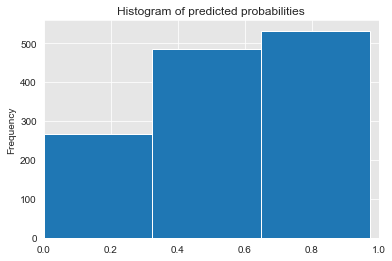

In [20]:
plt.hist(y2_predict_proba_logreg2, bins=3)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.ylabel('Frequency')

Confusion Matrix

[[  4  52   0]
 [  0 557 145]
 [  0 177 349]]
              precision    recall  f1-score   support

           1       1.00      0.07      0.13        56
           2       0.71      0.79      0.75       702
           3       0.71      0.66      0.68       526

    accuracy                           0.71      1284
   macro avg       0.81      0.51      0.52      1284
weighted avg       0.72      0.71      0.70      1284

Confusion Matrix, without normalization
[[  4  52   0]
 [  0 557 145]
 [  0 177 349]]


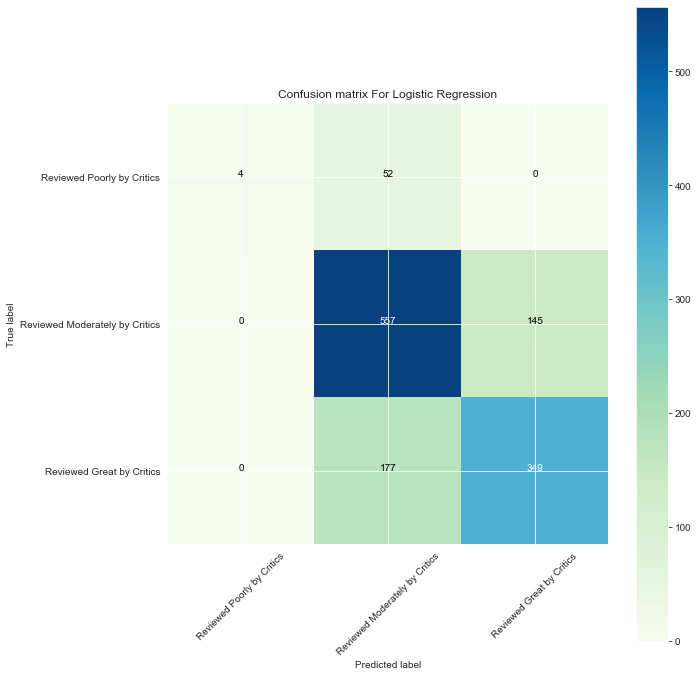

In [21]:
#text confusion matrix
print(confusion_matrix(y2_test, y2_pred_logreg))
print(classification_report(y2_test, y2_pred_logreg))

#visual confusion matrix
cm2 = confusion_matrix(y2_test,y2_pred_logreg)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix For Logistic Regression',
                          cmap=plt.cm.GnBu,)

In [22]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_logreg[0:25])
print(f'Accurary from 1st 25 values is {(18/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 3 2 3 2 3 2 2 3 3 2 2 2 3 2 3 2 3 2 3 3 3 2 3 2]
Accurary from 1st 25 values is 72.0%


### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [23]:
pred_manual_data(logreg2,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### KNN Model - Best Preformming Model 

In [24]:
# K_nearest Neighbor = 5
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5,p=1)
knn5.fit(X2_train, y2_train)
y2_pred_knn5 = knn5.predict(X2_test)


# K_nearest Neighbor = 3 using manhattan distance
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3,p=1,algorithm='kd_tree')
knn3.fit(X2_test, y2_test)
y2_pred_knn3 = knn3.predict(X2_test)


# Testing Accuracy
knn5_accuracy_train2 = knn5.score(X2_train,y2_train)
knn5_accuracy_test2 = knn5.score(X2_test,y2_test)

knn3_accuracy_train2 = knn3.score(X2_train,y2_train)
knn3_accuracy_test2 = knn3.score(X2_test,y2_test)

# Printing Accuracy
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train2}\n K_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test2}')
knn5_evalution = run_model('K_nearest Neighbor = 5', knn5,X2,y2,y2_test,y2_pred_knn5)
print_model("K_nearest Neighbor = 5", knn5,X2,y2,y2_test,y2_pred_knn5)


print(f'\n\nK_nearest Neighbor = 3 Regression train accuracy is {knn3_accuracy_train2}\n K_nearest Neighbor = 3 Regression test accuracy is {knn3_accuracy_test2}')
knn3_evalution = run_model('K_nearest Neighbor = 3', knn3,X2,y2,y2_test,y2_pred_knn3)
print_model("K_nearest Neighbor = 3", knn3,X2,y2,y2_test,y2_pred_knn3)



y2_predict_proba_knn5 = knn5.predict_proba(X2_test)

K_nearest Neighbor = 5 Regression train accuracy is 0.8106212424849699
 K_nearest Neighbor = 5 Regression test accuracy is 0.6861370716510904
K_nearest Neighbor = 5 Prediction accuracy is: 0.6861370716510904
 K_nearest Neighbor = 5 Mean cross validation is: 0.7190441350678243
  K_nearest Neighbor = 5 Precision score is: 0.6817508041091498
   K_nearest Neighbor = 5 Prediction recall score is: 0.6861370716510904
    K_nearest Neighbor = 5 Prediction f1 score is: 0.6819938421384036


K_nearest Neighbor = 3 Regression train accuracy is 0.6913827655310621
 K_nearest Neighbor = 3 Regression test accuracy is 0.8302180685358256
K_nearest Neighbor = 3 Prediction accuracy is: 0.8302180685358256
 K_nearest Neighbor = 3 Mean cross validation is: 0.7012761386770648
  K_nearest Neighbor = 3 Precision score is: 0.8289487863766737
   K_nearest Neighbor = 3 Prediction recall score is: 0.8302180685358256
    K_nearest Neighbor = 3 Prediction f1 score is: 0.8283478295875778


Confusion Matrix

[[ 28  28   0]
 [ 11 613  78]
 [  1 100 425]]
              precision    recall  f1-score   support

           1       0.70      0.50      0.58        56
           2       0.83      0.87      0.85       702
           3       0.84      0.81      0.83       526

    accuracy                           0.83      1284
   macro avg       0.79      0.73      0.75      1284
weighted avg       0.83      0.83      0.83      1284

Confusion Matrix, without normalization
[[ 28  28   0]
 [ 11 613  78]
 [  1 100 425]]


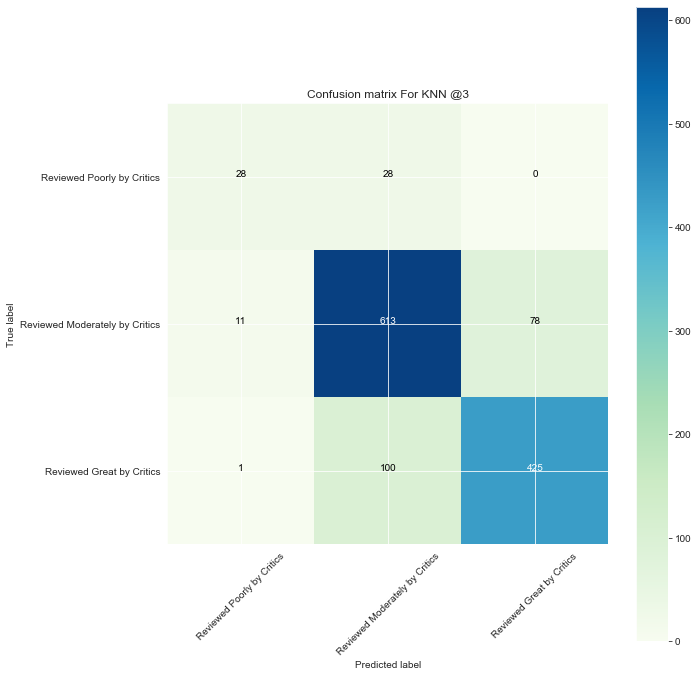

In [25]:
print(confusion_matrix(y2_test, y2_pred_knn3))
print(classification_report(y2_test, y2_pred_knn3))


cm = confusion_matrix(y2_test,y2_pred_knn3)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix For KNN @3',
                          cmap=plt.cm.GnBu)

In [26]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_knn3[0:25])
print(f'Accurary from 1st 25 values is {(20/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 3 3 3 2 3 3 2 3 3 1 2 2 3 2 2 2 3 2 2 3 2 2 3 2]
Accurary from 1st 25 values is 80.0%


### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [27]:
pred_manual_data(knn3,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### Random Forest Classifier

In [28]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X2_train,y2_train)
rf.score(X2_test,y2_test)
y2_pred_rf_2 = rf.predict(X2_test)

rf_accuracy_train_2 = rf.score(X2_train,y2_train)
rf_accuracy_test_2 = rf.score(X2_test,y2_test)

predict_acc = metrics.accuracy_score(y2_test,y2_pred_rf_2)
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_2}\nRandom Forest Classifier test accuracy is {rf_accuracy_test_2}\n')

rf_evalution = run_model('Random Forest', rf,X2,y2,y2_test,y2_pred_rf_2)
print_model("Random Forest Classifier", rf,X2,y2,y2_test,y2_pred_rf_2)

Random Forest Classifier train accuracy is 1.0
Random Forest Classifier test accuracy is 0.7507788161993769

Random Forest Classifier Prediction accuracy is: 0.7507788161993769
 Random Forest Classifier Mean cross validation is: 0.7440496935765236
  Random Forest Classifier Precision score is: 0.7594771548368863
   Random Forest Classifier Prediction recall score is: 0.7507788161993769
    Random Forest Classifier Prediction f1 score is: 0.7406566435503589


Confusion Matrix

[[ 11  43   2]
 [  1 602  99]
 [  0 175 351]]
              precision    recall  f1-score   support

           1       0.92      0.20      0.32        56
           2       0.73      0.86      0.79       702
           3       0.78      0.67      0.72       526

    accuracy                           0.75      1284
   macro avg       0.81      0.57      0.61      1284
weighted avg       0.76      0.75      0.74      1284

Confusion Matrix, without normalization
[[ 11  43   2]
 [  1 602  99]
 [  0 175 351]]


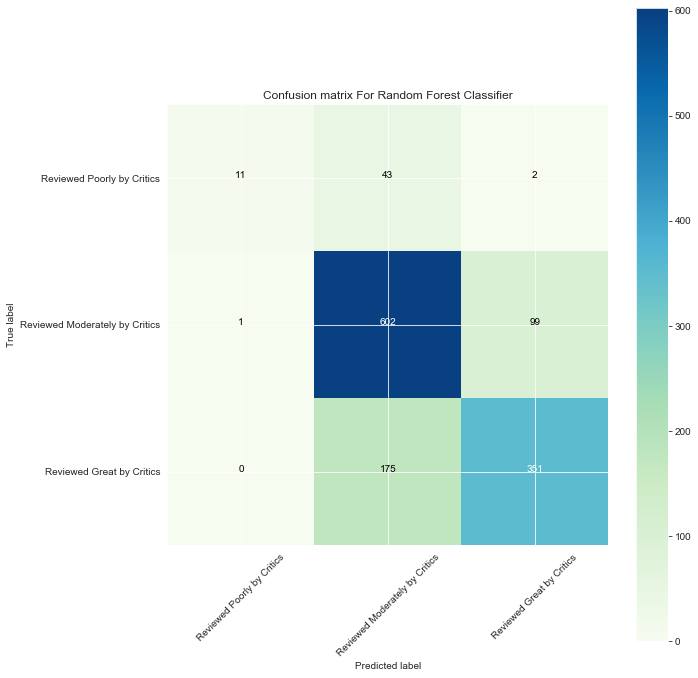

In [29]:
print(confusion_matrix(y2_test, y2_pred_rf_2))
print(classification_report(y2_test, y2_pred_rf_2))


cm3 = confusion_matrix(y2_test,y2_pred_rf_2)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm3, classes,
                          normalize=False,
                          title='Confusion matrix For Random Forest Classifier',
                          cmap=plt.cm.GnBu,)

In [30]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_rf_2[0:25])
print(f'Accurary from 1st 25 values is {(16/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [3 2 3 3 2 3 2 3 3 3 2 2 2 3 2 2 2 3 2 3 3 2 2 3 2]
Accurary from 1st 25 values is 64.0%


### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [31]:
pred_manual_data(rf,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### Support Vector Classification

In [32]:
# Support Vector Classification
svc = svm.SVC()
svc.fit(X2_train,y2_train)
svc.score(X2_test,y2_test)
y2_pred_svc = svc.predict(X2_test)

svc_accuracy_train_2 = svc.score(X2_train,y2_train)
svc_accuracy_test_2 = svc.score(X2_test,y2_test)


print(f'Support Vector Classification train accuracy is {svc_accuracy_train_2}\n Support Vector Classification test accuracy is {svc_accuracy_test_2}')

svc_evalution = run_model('Support Vector Classification', svc,X2,y2,y2_test,y2_pred_svc)
print_model("Support Vector Classification", svc,X2,y2,y2_test,y2_pred_svc)

Support Vector Classification train accuracy is 0.7702070808283233
 Support Vector Classification test accuracy is 0.7149532710280374
Support Vector Classification Prediction accuracy is: 0.7149532710280374
 Support Vector Classification Mean cross validation is: 0.7304922676332767
  Support Vector Classification Precision score is: 0.713980686771074
   Support Vector Classification Prediction recall score is: 0.7149532710280374
    Support Vector Classification Prediction f1 score is: 0.7049593270399589


Confusion Matrix

[[ 11  40   5]
 [  7 583 112]
 [  0 202 324]]
              precision    recall  f1-score   support

           1       0.61      0.20      0.30        56
           2       0.71      0.83      0.76       702
           3       0.73      0.62      0.67       526

    accuracy                           0.71      1284
   macro avg       0.68      0.55      0.58      1284
weighted avg       0.71      0.71      0.70      1284

Confusion Matrix, without normalization
[[ 11  40   5]
 [  7 583 112]
 [  0 202 324]]


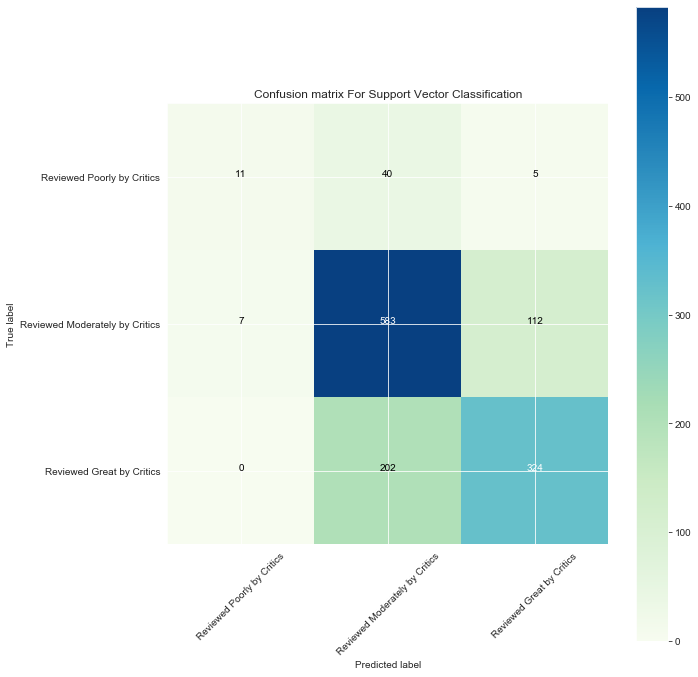

In [33]:
print(confusion_matrix(y2_test, y2_pred_svc))
print(classification_report(y2_test, y2_pred_svc))

cm4 = confusion_matrix(y2_test,y2_pred_svc)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm4, classes,
                          normalize=False,
                          title='Confusion matrix For Support Vector Classification',
                          cmap=plt.cm.GnBu)

In [34]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_svc[0:25])
print(f'Support Vector Classification Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 3 2 3 3 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 2 3 2]
Support Vector Classification Accurary from 1st 25 values is 60.0%


### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [35]:
pred_manual_data(svc,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### Bagging Trees Classifier 

In [36]:
bt2 = BaggingClassifier(base_estimator=svc, n_estimators=10, random_state=3).fit(X2_train, y2_train)

y2_pred_bt2 = bt2.predict(X2_test)

bt2_evalution = run_model('Bagging Trees', bt2,X2,y2,y2_test,y2_pred_bt2)
print_model('Bagging Trees', bt2,X2,y2,y2_test,y2_pred_bt2)

Bagging Trees Prediction accuracy is: 0.7126168224299065
 Bagging Trees Mean cross validation is: 0.7332976782210949
  Bagging Trees Precision score is: 0.7115975119412279
   Bagging Trees Prediction recall score is: 0.7126168224299065
    Bagging Trees Prediction f1 score is: 0.7046387410257757


Confusion Matrix

[[ 15  36   5]
 [ 11 580 111]
 [  0 206 320]]
              precision    recall  f1-score   support

           1       0.58      0.27      0.37        56
           2       0.71      0.83      0.76       702
           3       0.73      0.61      0.67       526

    accuracy                           0.71      1284
   macro avg       0.67      0.57      0.60      1284
weighted avg       0.71      0.71      0.70      1284

Confusion Matrix, without normalization
[[ 15  36   5]
 [ 11 580 111]
 [  0 206 320]]


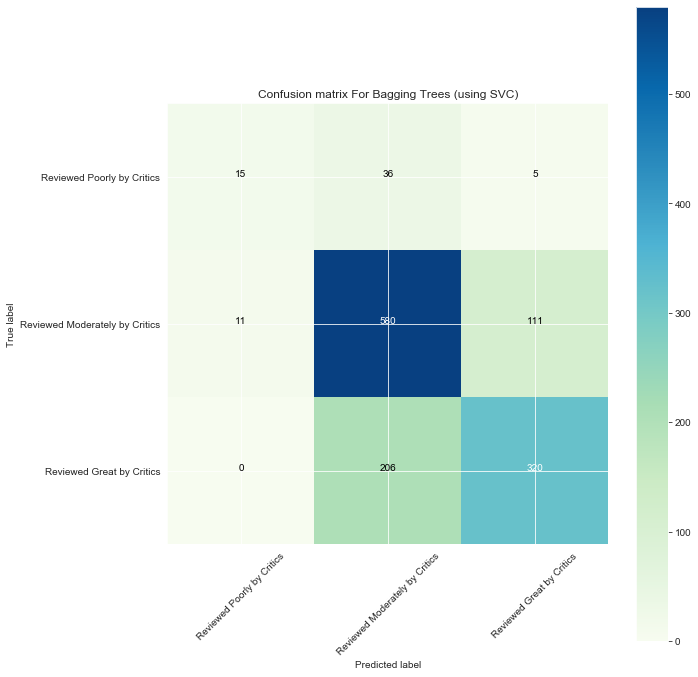

In [37]:
print(confusion_matrix(y2_test, y2_pred_bt2))
print(classification_report(y2_test, y2_pred_bt2))


cm7 = confusion_matrix(y2_test,y2_pred_bt2)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm7, classes,
                          normalize=False,
                          title='Confusion matrix For Bagging Trees (using SVC)',
                          cmap=plt.cm.GnBu)

In [38]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_bt2[0:25])
print(f'Bagging Trees (using SVC) Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 3 2 3 3 2 3 2 1 2 2 3 2 2 1 3 3 2 3 2 2 3 2]
Bagging Trees (using SVC) Accurary from 1st 25 values is 60.0%


### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [39]:
pred_manual_data(bt2,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### Decision Tree Classifier

In [40]:
#Decision Tree Classifier
dt2= DecisionTreeClassifier(max_depth=3, random_state=3)
dt2.fit(X2_train,y2_train)
y2_pred_dt = dt2.predict(X2_test)

dt_accuracy_train2 = dt2.score(X2_train ,y2_train)
dt_accuracy_test2 = dt2.score(X2_test,y2_test)

            
print(f'Decision Tree train accuracy is {dt_accuracy_train2}\n Decision Tree test accuracy is {dt_accuracy_test2}')

dt2_evalution = run_model('Decision Tree', dt2,X2,y2,y2_test,y2_pred_dt)
print_model('Decision Tree Classifier', dt2,X2,y2,y2_test,y2_pred_dt)

Decision Tree train accuracy is 0.7267869071476286
 Decision Tree test accuracy is 0.6962616822429907


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree Classifier Prediction accuracy is: 0.6962616822429907
 Decision Tree Classifier Mean cross validation is: 0.7108545498447574
  Decision Tree Classifier Precision score is: 0.6661886125393676
   Decision Tree Classifier Prediction recall score is: 0.6962616822429907
    Decision Tree Classifier Prediction f1 score is: 0.6808665322182949


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Visualization of the Decision Tree my model computed

[Text(279.0, 475.65000000000003, 'X[6] <= 76.5\ngini = 0.531\nsamples = 2994\nvalue = [126, 1627, 1241]'),
 Text(139.5, 339.75, 'X[7] <= 323.0\ngini = 0.436\nsamples = 1498\nvalue = [120, 1078, 300]'),
 Text(69.75, 203.85000000000002, 'X[6] <= 48.5\ngini = 0.399\nsamples = 1401\nvalue = [119, 1056, 226]'),
 Text(34.875, 67.94999999999999, 'gini = 0.502\nsamples = 192\nvalue = [79, 110, 3]'),
 Text(104.625, 67.94999999999999, 'gini = 0.353\nsamples = 1209\nvalue = [40, 946, 223]'),
 Text(209.25, 203.85000000000002, 'X[5] <= 0.225\ngini = 0.366\nsamples = 97\nvalue = [1, 22, 74]'),
 Text(174.375, 67.94999999999999, 'gini = 0.537\nsamples = 23\nvalue = [1, 10, 12]'),
 Text(244.125, 67.94999999999999, 'gini = 0.272\nsamples = 74\nvalue = [0, 12, 62]'),
 Text(418.5, 339.75, 'X[7] <= 43.5\ngini = 0.47\nsamples = 1496\nvalue = [6, 549, 941]'),
 Text(348.75, 203.85000000000002, 'X[7] <= 10.5\ngini = 0.503\nsamples = 844\nvalue = [6, 458, 380]'),
 Text(313.875, 67.94999999999999, 'gini = 0.436\

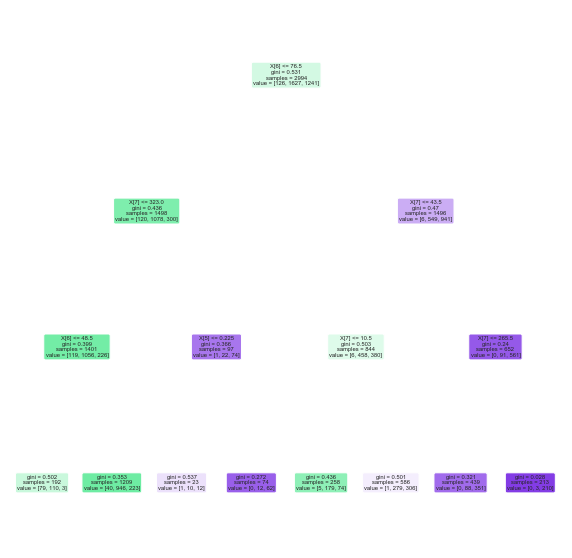

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
tree.plot_tree(dt2, filled=True, rounded=True)

Confusion Matrix

[[  0  52   4]
 [  0 521 181]
 [  0 153 373]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        56
           2       0.72      0.74      0.73       702
           3       0.67      0.71      0.69       526

    accuracy                           0.70      1284
   macro avg       0.46      0.48      0.47      1284
weighted avg       0.67      0.70      0.68      1284

Confusion Matrix, without normalization
[[  0  52   4]
 [  0 521 181]
 [  0 153 373]]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


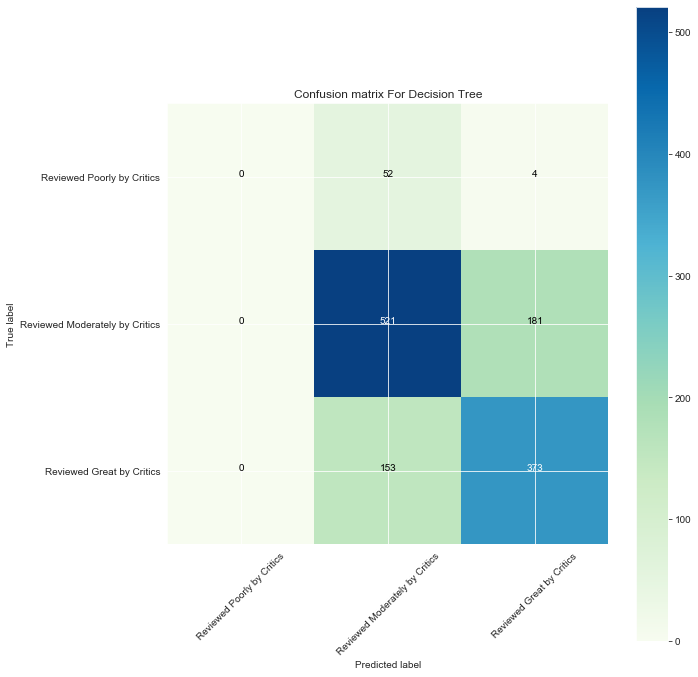

In [42]:
print(confusion_matrix(y2_test, y2_pred_dt))
print(classification_report(y2_test, y2_pred_dt))

cm5 = confusion_matrix(y2_test,y2_pred_dt)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm5, classes,
                          normalize=False,
                          title='Confusion matrix For Decision Tree',
                          cmap=plt.cm.GnBu,)

In [43]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_dt[0:25])
print(f'Decision Tree Classifier Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 3 3 2 3 3 2 3 2 2 2 2 3 2 2 2 3 3 2 3 2 2 3 2]
Decision Tree Classifier Accurary from 1st 25 values is 60.0%


### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [44]:
pred_manual_data(dt2,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### Bernoulli NB Classifier

In [45]:
# Bernoulli NB Classifier

clf2= BernoulliNB()
clf2.fit(X2_train,y2_train)
y2_pred_clf = clf2.predict(X2_test)
y_predict_proba_clf2 = clf2.predict_proba( X2_test)

clf_accuracy_train2 = clf2.score(X2_train ,y2_train)
clf_accuracy_test2 = clf2.score(X2_test,y2_test)

print(f'Bernoulli NB train accuracy is {clf_accuracy_train2}\n Bernoulli NB test accuracy is {clf_accuracy_test2}')


clf2_evalution = run_model('BernoulliNB', clf2,X2,y2,y2_test,y2_pred_clf)
print_model('BernoulliNB', clf2,X2,y2,y2_test,y2_pred_clf)


Bernoulli NB train accuracy is 0.6576486305945224
 Bernoulli NB test accuracy is 0.6300623052959502
BernoulliNB Prediction accuracy is: 0.6300623052959502
 BernoulliNB Mean cross validation is: 0.625071504006459
  BernoulliNB Precision score is: 0.617462839627618
   BernoulliNB Prediction recall score is: 0.6300623052959502
    BernoulliNB Prediction f1 score is: 0.6183972829432771


Confusion Matrix

[[  4  41  11]
 [  6 514 182]
 [  2 233 291]]
              precision    recall  f1-score   support

           1       0.33      0.07      0.12        56
           2       0.65      0.73      0.69       702
           3       0.60      0.55      0.58       526

    accuracy                           0.63      1284
   macro avg       0.53      0.45      0.46      1284
weighted avg       0.62      0.63      0.62      1284

Confusion Matrix, without normalization
[[  4  41  11]
 [  6 514 182]
 [  2 233 291]]


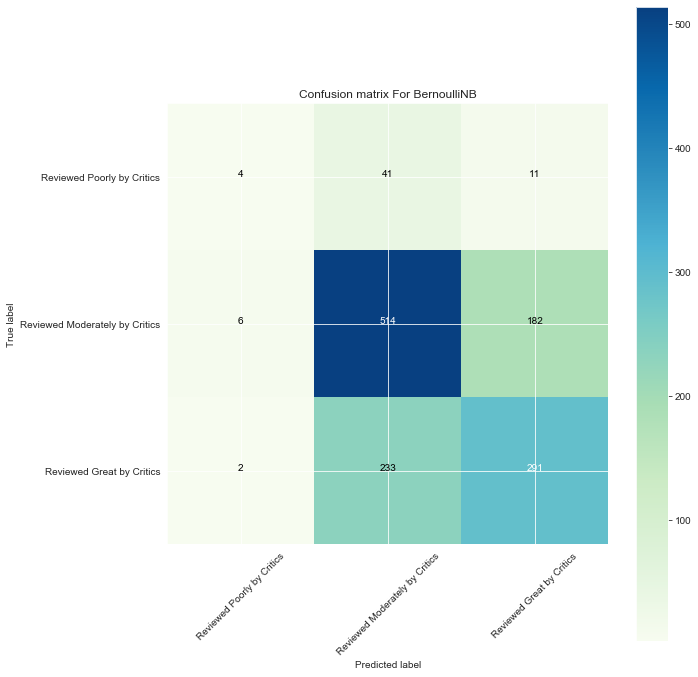

In [46]:
print(confusion_matrix(y2_test, y2_pred_clf))
print(classification_report(y2_test, y2_pred_clf))

cm6 = confusion_matrix(y2_test,y2_pred_clf)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm6, classes,
                          normalize=False,
                          title='Confusion matrix For BernoulliNB',
                          cmap=plt.cm.GnBu,)

In [47]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_clf[0:25])
print(f'Bernoulli NB Classifier Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [3 2 2 2 2 2 2 3 2 3 2 2 3 3 2 2 2 3 2 3 3 2 2 3 3]
Bernoulli NB Classifier Accurary from 1st 25 values is 60.0%


#### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [48]:
pred_manual_data(clf2,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


### Stochastic Gradient Descent Classifier

In [49]:
# Stochastic Gradient Descent Classifier

sgd= SGDClassifier(loss='modified_huber')
sgd.fit(X2_train,y2_train)
y2_pred_sgd = sgd.predict(X2_test)
y_predict_proba_sgd = sgd.predict_proba( X2_test)

sgd_accuracy_train2 = sgd.score(X2_train ,y2_train)
sgd_accuracy_test2 = sgd.score(X2_test,y2_test)

print(f'SGD Classifier train accuracy is {sgd_accuracy_train2}\n SGD Classifier test accuracy is {sgd_accuracy_test2}')


sgd_evalution = run_model('Stochastic Gradient Descent Classifier', sgd,X2,y2,y2_test,y2_pred_sgd)
print_model('Stochastic Gradient Descent Classifier', sgd,X2,y2,y2_test,y2_pred_sgd)


SGD Classifier train accuracy is 0.6439545758183033
 SGD Classifier test accuracy is 0.6394080996884736


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Stochastic Gradient Descent Classifier Prediction accuracy is: 0.6394080996884736
 Stochastic Gradient Descent Classifier Mean cross validation is: 0.5897478316593822
  Stochastic Gradient Descent Classifier Precision score is: 0.6993442313719866
   Stochastic Gradient Descent Classifier Prediction recall score is: 0.6394080996884736
    Stochastic Gradient Descent Classifier Prediction f1 score is: 0.5715797807450017


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix

[[  0  56   0]
 [  0 687  15]
 [  0 392 134]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        56
           2       0.61      0.98      0.75       702
           3       0.90      0.25      0.40       526

    accuracy                           0.64      1284
   macro avg       0.50      0.41      0.38      1284
weighted avg       0.70      0.64      0.57      1284

Confusion Matrix, without normalization
[[  0  56   0]
 [  0 687  15]
 [  0 392 134]]


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


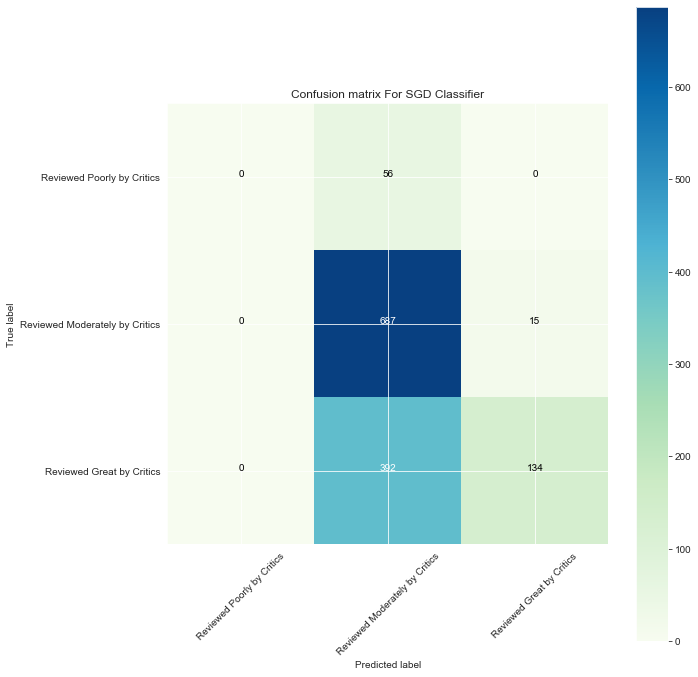

In [50]:
print(confusion_matrix(y2_test, y2_pred_sgd))
print(classification_report(y2_test, y2_pred_sgd))

cm8 = confusion_matrix(y2_test,y2_pred_sgd)
classes = ['Reviewed Poorly by Critics', 'Reviewed Moderately by Critics', 'Reviewed Great by Critics']

fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(cm8, classes,
                          normalize=False,
                          title='Confusion matrix For SGD Classifier',
                          cmap=plt.cm.GnBu,)

In [51]:
print('True:', y2_test.values[0:25])
print('Pred:', y2_pred_sgd[0:25])
print(f'SGD Classifier Accurary from 1st 25 values is {(15/25)*100}%')

True: [2 3 3 3 2 3 3 3 2 3 1 2 3 3 3 2 2 3 2 3 3 3 2 3 2]
Pred: [2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 3 2]
SGD Classifier Accurary from 1st 25 values is 60.0%


#### Running Predictive Model with Manual datapoint to predict if the game is under a classification

In [52]:
pred_manual_data(sgd,X2,y2, X2_manual)

 The predicted class of the manually added X value is [3] or Highly Scored on Metacritic


# All Results

In [53]:
#Table with results of all the models I ran across all scores
all_evaluations_table = pd.DataFrame()

all_evaluations_table = all_evaluations_table.append([dummy_c_evalution, knn3_evalution, logreg_evalution, rf_evalution, svc_evalution, bt2_evalution, dt2_evalution, clf2_evalution, sgd_evalution])
all_evaluations_table.columns = ['Model', 'Accuracy Score','Cross-Val Acc Score' ,'Precision Score', 'Recall Score', 'F1 Score']
all_evaluations_table['Classification for Manual X'] = [dummy_c.y2_pred_X_manual, knn3.y2_pred_X_manual, logreg2.y2_pred_X_manual, rf.y2_pred_X_manual, svc.y2_pred_X_manual, bt2.y2_pred_X_manual, dt2.y2_pred_X_manual, clf2.y2_pred_X_manual, sgd.y2_pred_X_manual]
all_evaluations_table

,Model,Accuracy Score,Cross-Val Acc Score,Precision Score,Recall Score,F1 Score,Classification for Manual X
0,Baseline,0.463396,0.472145,0.460336,0.463396,0.461842,[2]
1,K_nearest Neighbor = 3,0.830218,0.701276,0.828949,0.830218,0.828348,[3]
2,Logistic Regression,0.708723,0.725801,0.720468,0.708723,0.695461,[3]
3,Random Forest,0.750779,0.748961,0.759477,0.750779,0.740657,[3]
4,Support Vector Classification,0.714953,0.730492,0.713981,0.714953,0.704959,[3]
5,Bagging Trees,0.712617,0.733298,0.711598,0.712617,0.704639,[3]
6,Decision Tree,0.696262,0.710855,0.666189,0.696262,0.680867,[3]
7,BernoulliNB,0.630062,0.625072,0.617463,0.630062,0.618397,[3]
8,Stochastic Gradient Descent Classifier,0.639408,0.659642,0.699344,0.639408,0.571580,[3]
